<a href="https://colab.research.google.com/github/Uditsingh7/Machine_Learning_Projects/blob/main/Udit_Heart_Disease_Prediction_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HEART DISEASE PREDICTION USING LOGISTIC REGRESSION**

### Introduction
World Health Organization has estimated 12 million deaths occur worldwide, every year due to Heart diseases. Half the deaths in the United States and other developed countries are due to cardio vascular diseases. The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications. This research intends to pinpoint the most relevant/risk factors of heart disease as well as predict the overall risk using logistic regression.





In [24]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
%matplotlib inline

## Data Preparation
### Source:
The dataset is publically available on the Kaggle website, and it is from an ongoing ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.

In [25]:
heart_df=pd.read_csv("./framingham.csv")
heart_df.drop(['education'],axis=1,inplace=True)
heart_df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


### Variables :
Each attribute is a potential risk factor. There are both demographic, behavioural and medical risk factors.

Demographic: sex: male or female;(Nominal)

age: age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
Behavioural

currentSmoker: whether or not the patient is a current smoker (Nominal)

cigsPerDay: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarretts, even half a cigarette.)

### Medical( history):

BPMeds: whether or not the patient was on blood pressure medication (Nominal)

prevalentStroke: whether or not the patient had previously had a stroke (Nominal)

prevalentHyp: whether or not the patient was hypertensive (Nominal)

diabetes: whether or not the patient had diabetes (Nominal)

Medical(current):

totChol: total cholesterol level (Continuous)

sysBP: systolic blood pressure (Continuous)

diaBP: diastolic blood pressure (Continuous)

BMI: Body Mass Index (Continuous)

heartRate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)

glucose: glucose level (Continuous)

### Predict variable (desired target):

10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)

In [26]:
heart_df.rename(columns={'male':'Sex_male'},inplace=True)

### Missing values

In [27]:
heart_df.isnull().sum()

,0
Sex_male,0
age,0
currentSmoker,0
cigsPerDay,29
BPMeds,53
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,50
sysBP,0


In [28]:
count=0
for i in heart_df.isnull().sum(axis=1):
    if i>0:
        count=count+1
print('Total number of rows with missing values is ', count)
print('since it is only',round((count/len(heart_df.index))*100), 'percent of the entire dataset the rows with missing values are excluded.')

Total number of rows with missing values is  489
since it is only 12 percent of the entire dataset the rows with missing values are excluded.


In [29]:
heart_df.dropna(axis=0,inplace=True)

## Exploratory Analysis

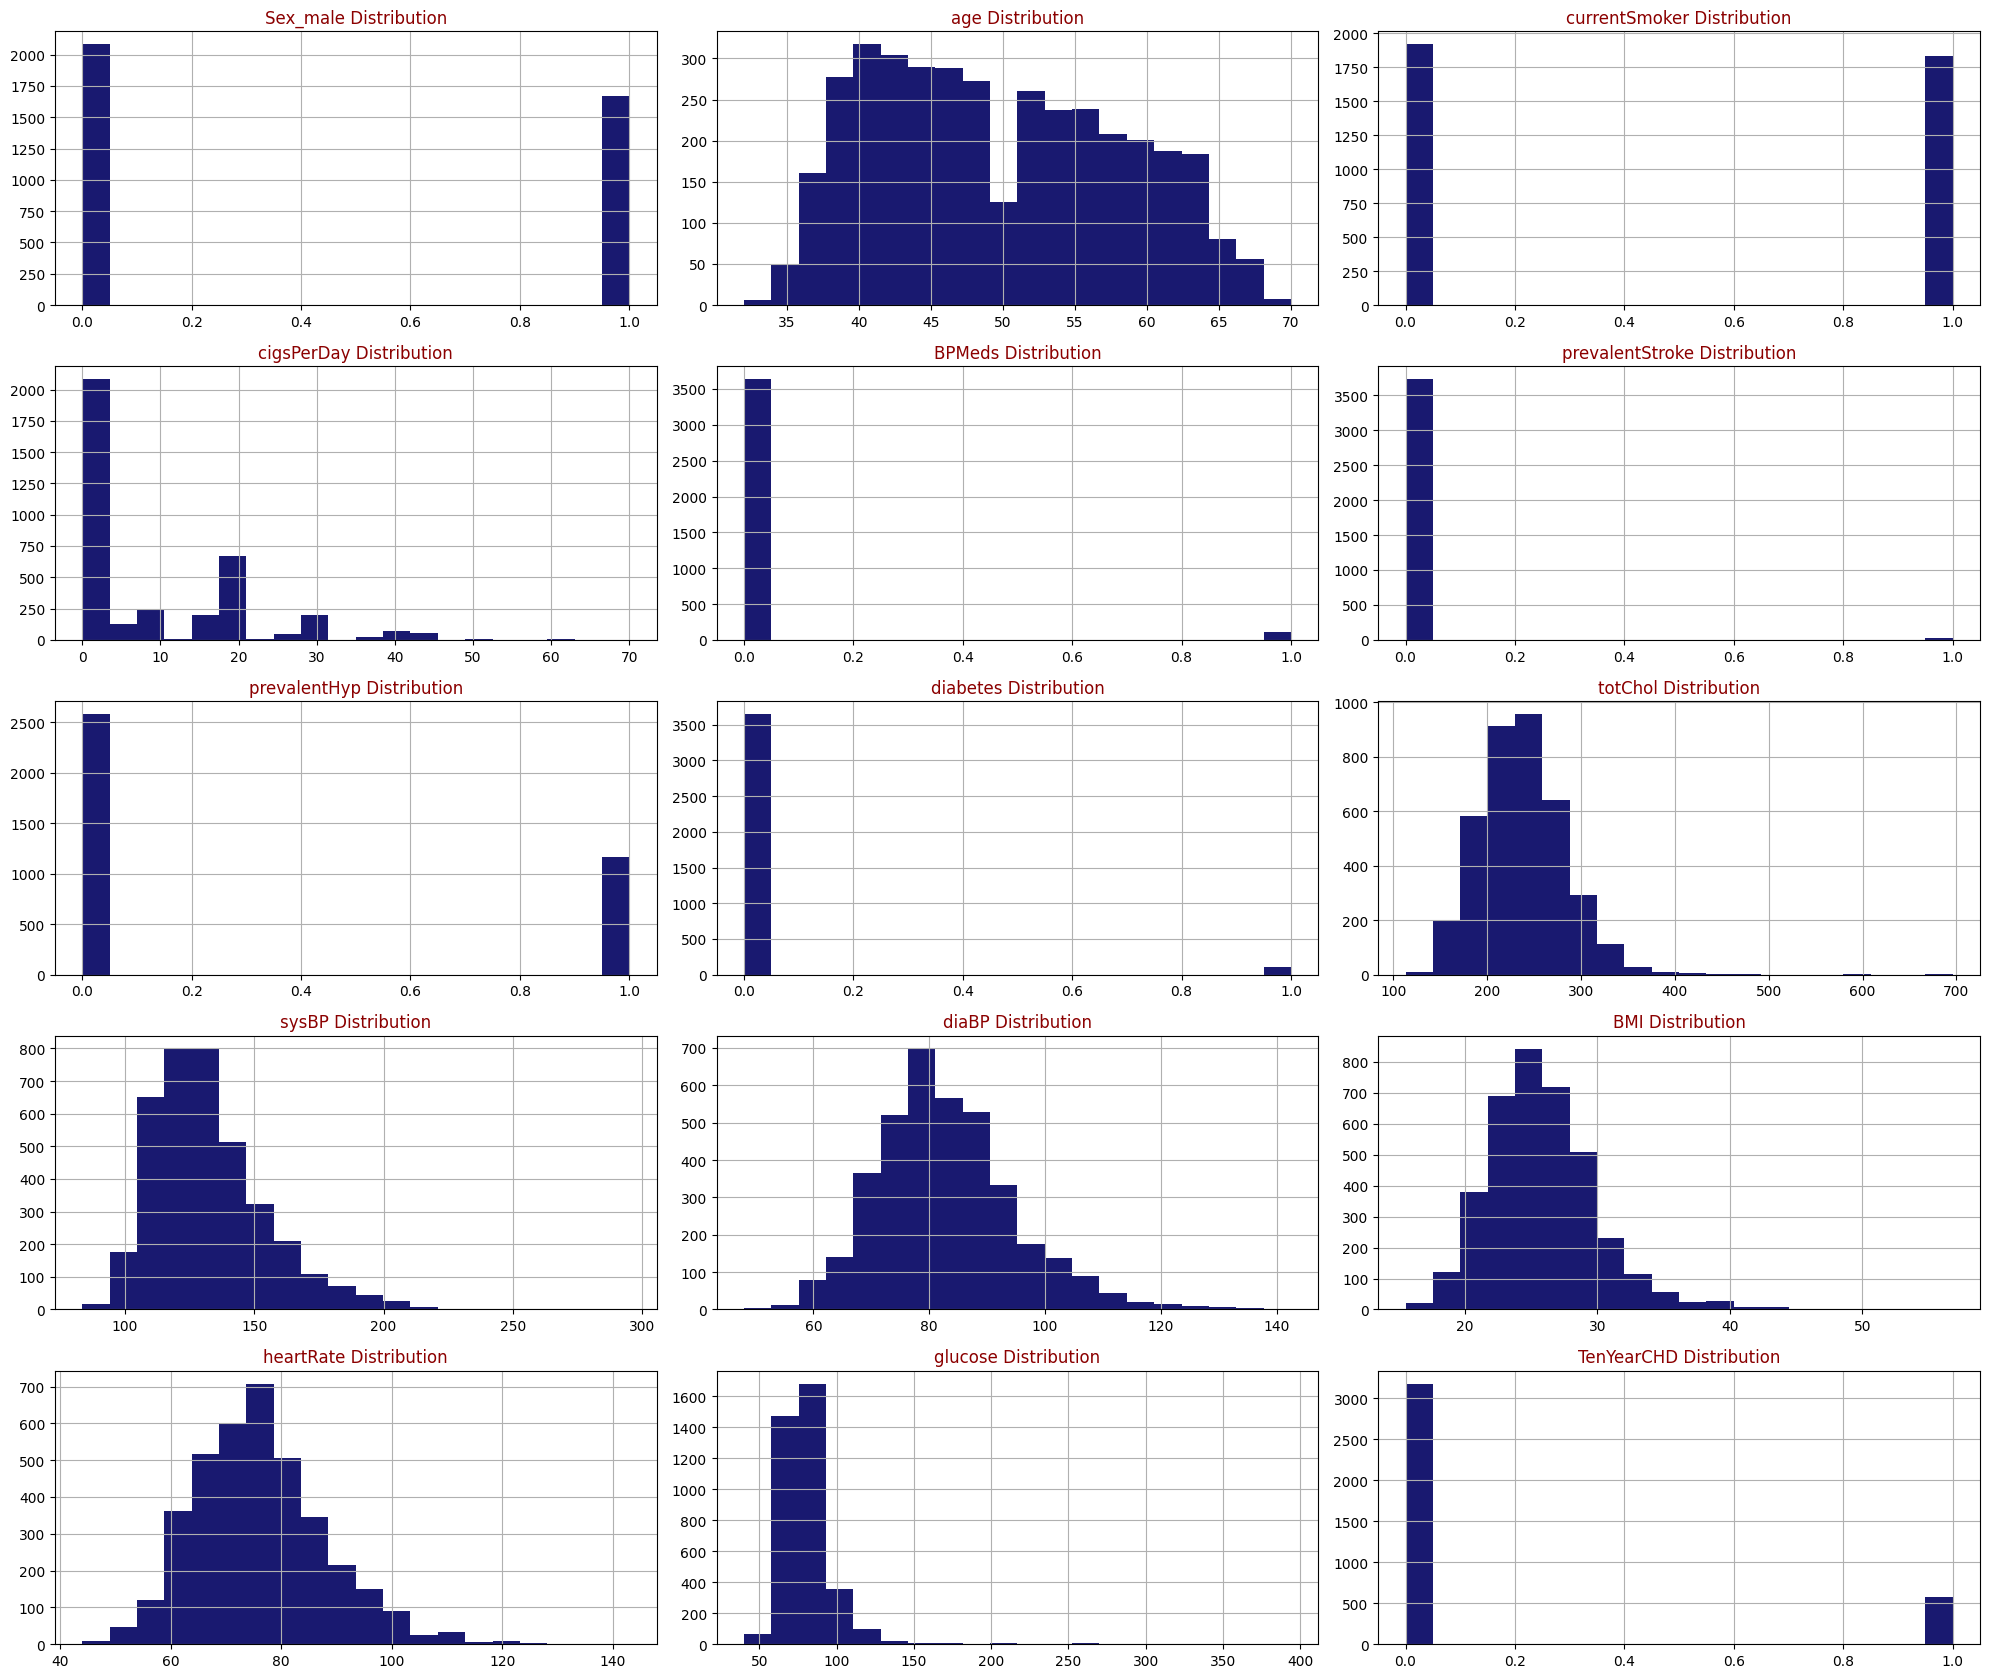

In [30]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')

    fig.tight_layout()
    plt.show()
draw_histograms(heart_df,heart_df.columns,6,3)

### Histogram Explanations:

*   **Sex_male Distribution**: This histogram shows the count of individuals categorized by sex (0 for female, 1 for male).
*   **age Distribution**: This histogram illustrates the distribution of ages among the participants.
*   **currentSmoker Distribution**: This histogram indicates the number of current smokers versus non-smokers.
*   **cigsPerDay Distribution**: This histogram displays the daily cigarette consumption, with a large peak at zero for non-smokers.
*   **BPMeds Distribution**: This histogram shows the count of individuals who are on blood pressure medication versus those who are not.
*   **prevalentStroke Distribution**: This histogram shows the number of individuals who have previously had a stroke versus those who have not.
*   **prevalentHyp Distribution**: This histogram indicates the count of individuals with prevalent hypertension versus those without.
*   **diabetes Distribution**: This histogram displays the number of individuals diagnosed with diabetes versus those without.
*   **totChol Distribution**: This histogram represents the distribution of total cholesterol levels.
*   **sysBP Distribution**: This histogram shows the distribution of systolic blood pressure readings.
*   **diaBP Distribution**: This histogram illustrates the distribution of diastolic blood pressure readings.
*   **BMI Distribution**: This histogram displays the distribution of Body Mass Index values.
*   **heartRate Distribution**: This histogram shows the distribution of heart rates among the participants.
*   **glucose Distribution**: This histogram represents the distribution of glucose levels, likely skewed towards lower values with a tail for higher values.
*   **TenYearCHD Distribution**: This histogram indicates the number of individuals at risk of coronary heart disease within 10 years versus those not at risk.

***
_User requested comment to be added at the end of the cell - please provide the specific comment you would like to include here._

In [31]:
heart_df.TenYearCHD.value_counts()

,count
TenYearCHD,
0,3179
1,572


<Axes: xlabel='TenYearCHD', ylabel='count'>

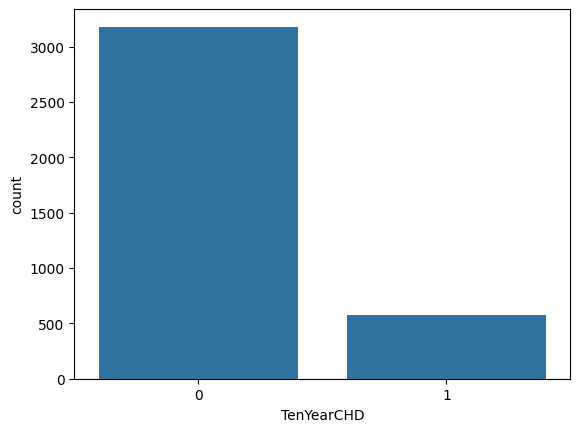

In [32]:
sn.countplot(x='TenYearCHD',data=heart_df)

There are 3179 patents with no heart disease and 572 patients with risk of heart disease.

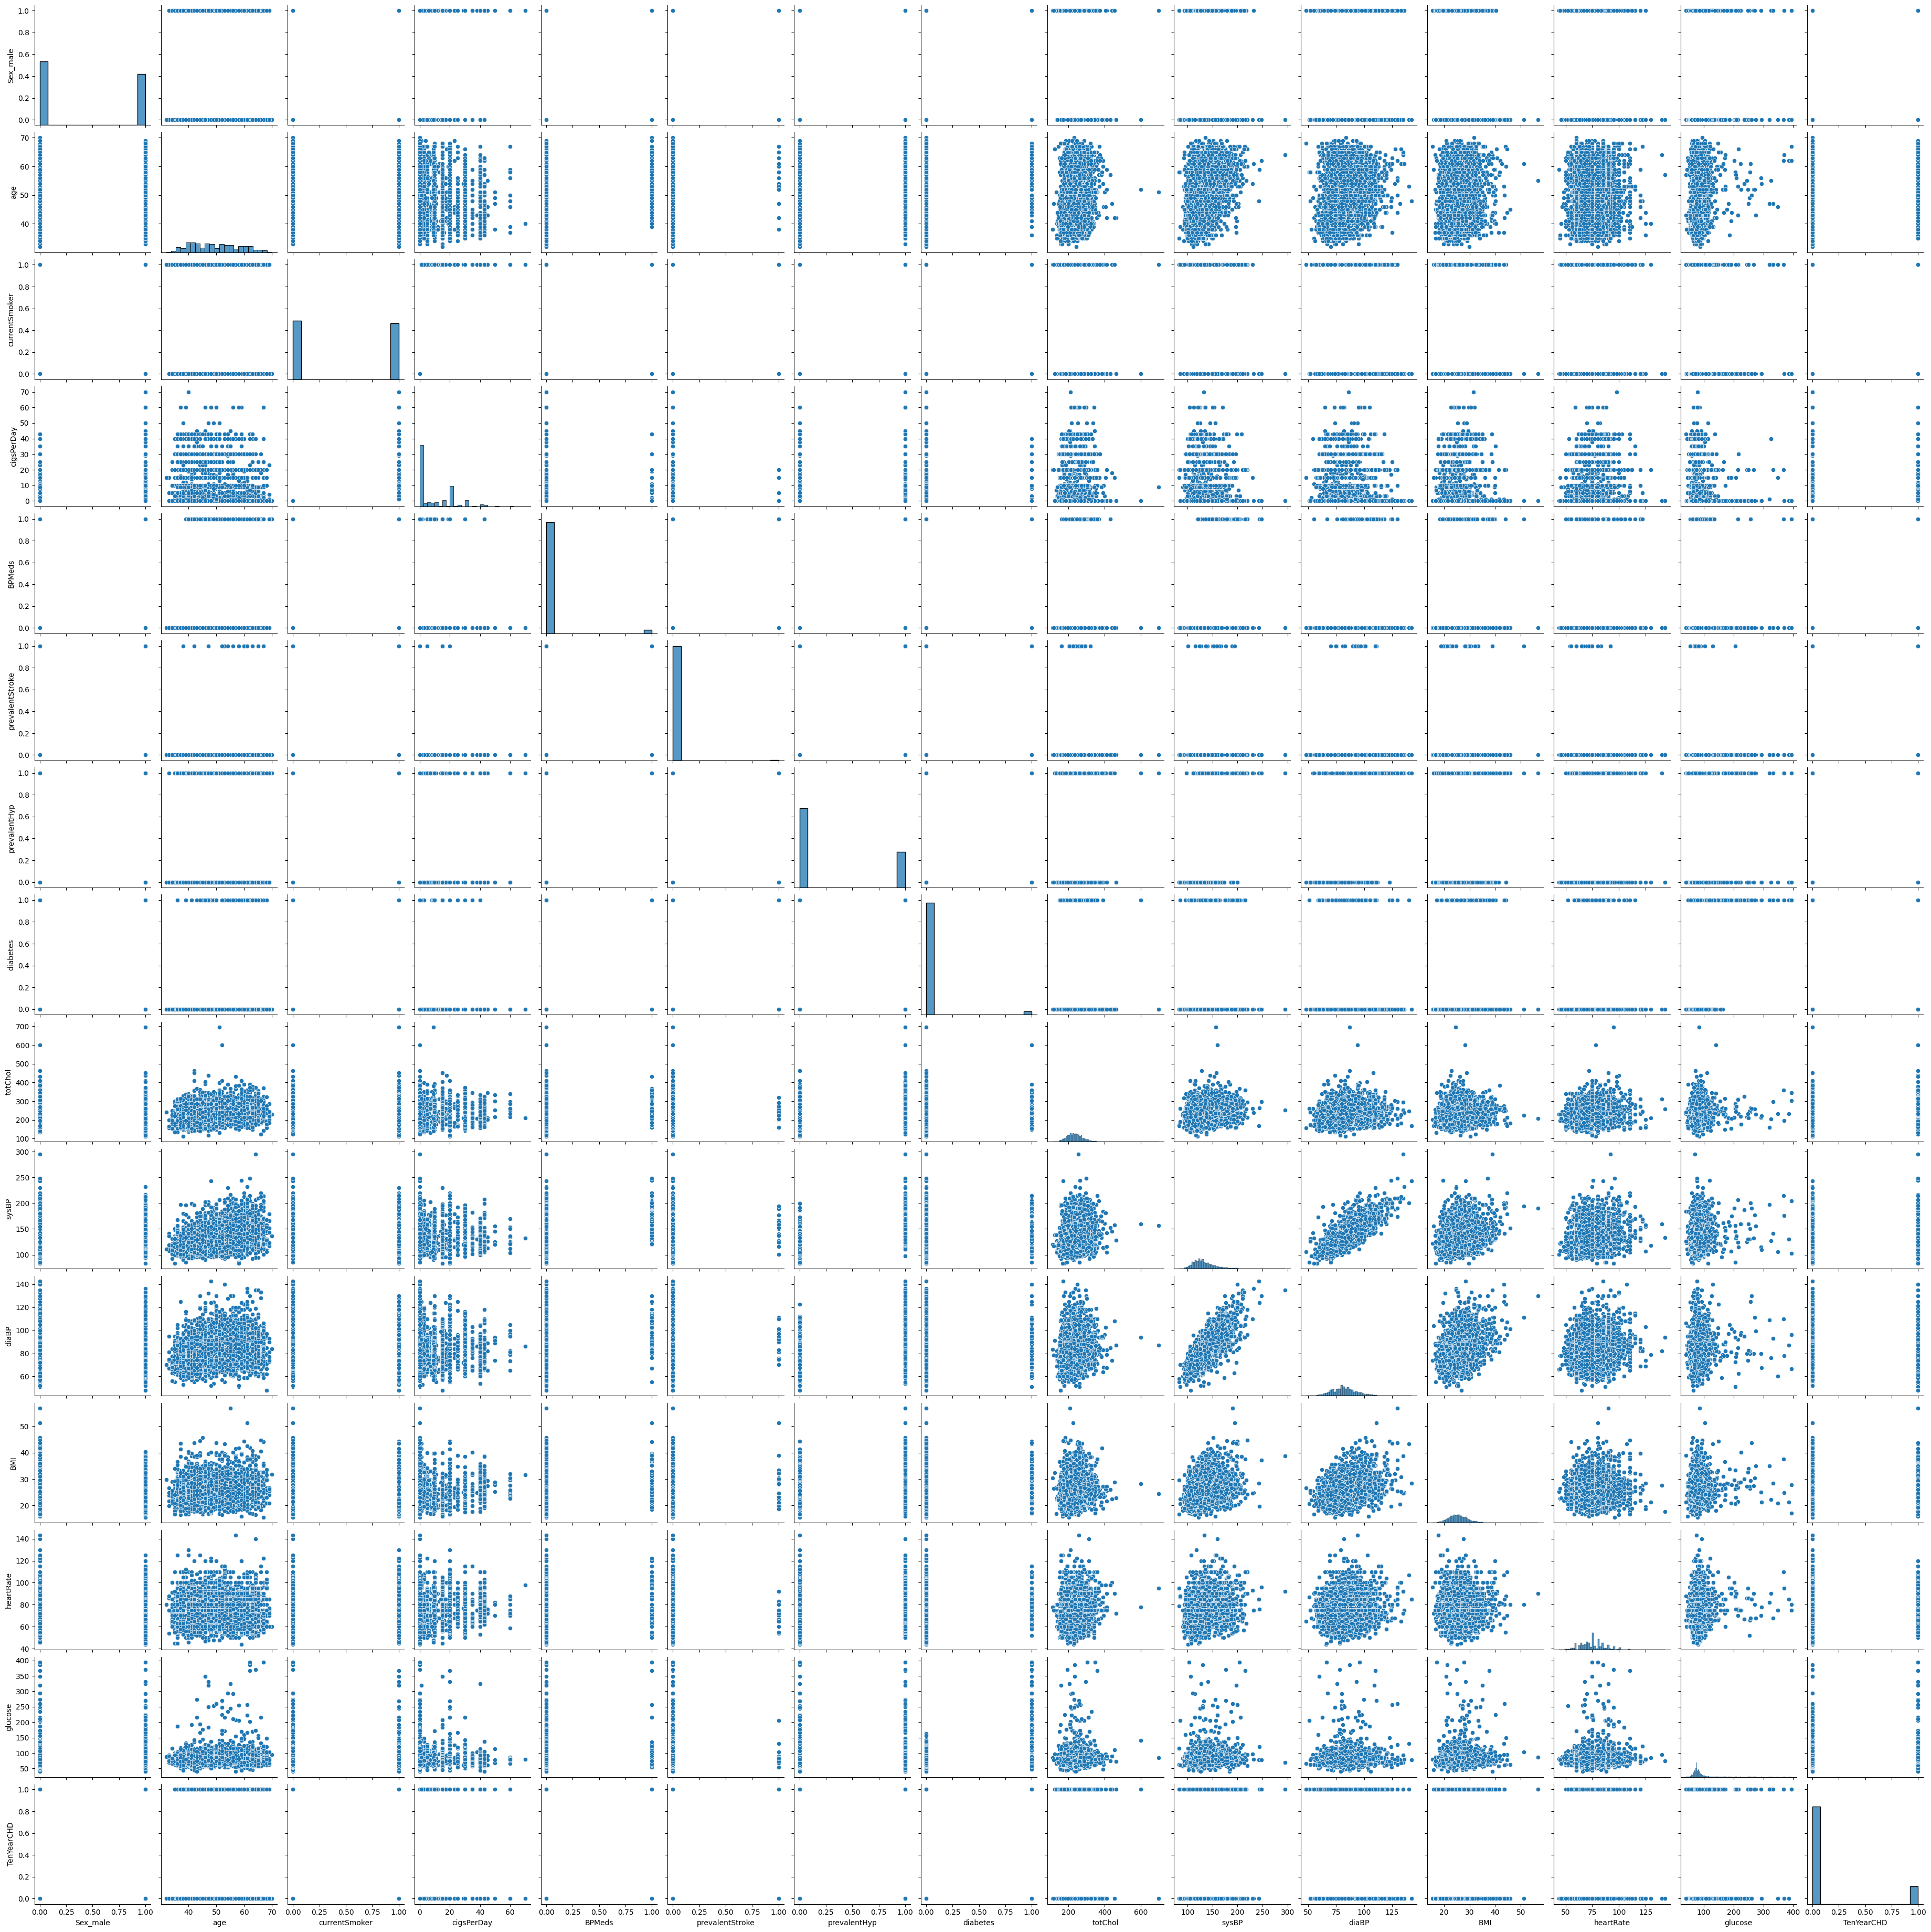

In [33]:
sn.pairplot(data=heart_df)

### `TenYearCHD` Distribution:

This bar plot visually represents the count of individuals with and without the 10-year risk of coronary heart disease (CHD). The '0' bar shows individuals without risk, and the '1' bar shows those with risk. This highlights the class imbalance in the target variable.

***
_Summary: The dataset shows a significant imbalance, with many more individuals not at risk of CHD than those who are._

In [34]:
heart_df.describe()

,Sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000
mean,0.445215,49.573447,0.488403,9.008531,0.030392,0.005599,0.311917,0.027193,236.928019,132.368435,82.938550,25.808288,75.704079,81.880032,0.152493
std,0.497056,8.570204,0.499932,11.925097,0.171686,0.074623,0.463338,0.162666,44.611594,22.046522,11.932779,4.065599,11.956382,23.882233,0.359546
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.085000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.000000,90.000000,28.060000,82.000000,87.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


### Summary of Descriptive Statistics:

The `describe()` output provides a statistical overview of the numerical features in the dataset, including:

*   **Count**: The number of non-null observations for each feature, which is consistent at 3751 across all columns after dropping missing values.
*   **Mean**: The average value for each feature. For example, the average age is around 49.6 years, and the average number of cigarettes per day is about 9.
*   **Standard Deviation (std)**: Measures the amount of variation or dispersion of a set of values. A higher std indicates more spread out data.
*   **Min/Max**: The smallest and largest values for each feature, giving the range of the data.
*   **25th, 50th (Median), 75th Percentiles**: These indicate the values below which a given percentage of observations fall. The 50th percentile (median) is particularly useful as it's less affected by outliers than the mean.

**Key Observations:**

*   **Age**: Ranges from 32 to 70, with a median of 49, suggesting a middle-aged to older adult population.
*   **CigsPerDay**: A mean of 9.0 suggests some smoking, but the 50th percentile being 0 indicates that a large portion of the population does not smoke at all.
*   **Cholesterol (totChol)**: Average is around 237, with a range from 113 to 696. The 75th percentile is 264.
*   **Blood Pressure (sysBP, diaBP)**: Average systolic BP is 132.4 and diastolic BP is 82.9, with some individuals having very high readings.
*   **BMI**: Ranges from 15.54 to 56.8, with an average of 25.8, indicating a mix of healthy and overweight/obese individuals.
*   **Glucose**: A wide range from 40 to 394, with an average of 81.9, suggesting variability in blood sugar levels.
*   **TenYearCHD**: The mean of 0.152 shows that approximately 15.2% of the individuals in this dataset are at risk of developing Coronary Heart Disease within 10 years, reinforcing the class imbalance observed earlier.

## Logistic Regression

Logistic regression is a type of regression analysis in statistics used for prediction of outcome of a categorical dependent variable from a set of predictor or independent variables. In logistic regression the dependent variable is always binary. Logistic regression is mainly used to for prediction and also calculating the probability of success.

In [35]:
from statsmodels.tools import add_constant as add_constant
heart_df_constant = add_constant(heart_df)
heart_df_constant.head()

,const,Sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,1.0,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1.0,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,1.0,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,1.0,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


### Explanation of Logistic Regression Model Summary (`result.summary()`):

The `result.summary()` output provides a detailed statistical report for the logistic regression model. Here's a breakdown of the key sections:

*   **Model Information**: This section typically includes details like the dependent variable (`TenYearCHD`), the model type (Logistic Regression), the estimation method (MLE - Maximum Likelihood Estimation), and the number of observations used in fitting the model.

*   **Goodness of Fit**: This part assesses how well the model fits the data.
    *   **Log-Likelihood**: A measure of how well the model parameters explain the observed data. Higher values (closer to zero) generally indicate a better fit.
    *   **Pseudo R-squ.**: Analogous to R-squared in linear regression, but interpreted differently. It indicates the proportion of variance in the dependent variable that is predictable from the independent variables. Higher values suggest a better fit, but they cannot be interpreted as directly as R-squared.
    *   **LLR p-value**: The p-value for the Likelihood Ratio Test (LRT). A small p-value (typically < 0.05) suggests that the model with predictors is significantly better than a null model (a model with only an intercept).

*   **Coefficients Table**: This is the most crucial part, showing the estimated coefficients for each predictor variable.
    *   **coef**: These are the estimated regression coefficients (log-odds). For a one-unit increase in the predictor, the log-odds of the dependent variable (e.g., having CHD) change by this amount, holding other variables constant. To interpret in terms of odds, you can exponentiate the coefficient (exp(coef)).
    *   **Std.Err**: The standard error of the coefficient, indicating the precision of the coefficient estimate.
    *   **z**: The z-statistic, which is the coefficient divided by its standard error. It measures how many standard deviations an estimate is from zero.
    *   **P>|z|**: The p-value associated with the z-statistic. This is used to determine the statistical significance of each predictor. If `P>|z|` is less than your chosen significance level (e.g., 0.05), it suggests that the predictor has a statistically significant relationship with the dependent variable.
    *   **[0.025, 0.975]**: This represents the 95% confidence interval for the coefficient. It means we are 95% confident that the true population coefficient lies within this range. If this interval includes zero, the coefficient is not statistically significant at the 0.05 level.

**In summary, this output helps us understand which factors are statistically significant in predicting the 10-year risk of coronary heart disease and the strength and direction of their relationship with the outcome.**

In [36]:
st.chisqprob = lambda chisq, df: st.chi2.sf(chisq, df)
cols=heart_df_constant.columns[:-1]
model=sm.Logit(heart_df.TenYearCHD,heart_df_constant[cols])
result=model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.377036
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3751
Model:                          Logit   Df Residuals:                     3736
Method:                           MLE   Df Model:                           14
Date:                Tue, 18 Nov 2025   Pseudo R-squ.:                  0.1170
Time:                        12:43:24   Log-Likelihood:                -1414.3
converged:                       True   LL-Null:                       -1601.7
Covariance Type:            nonrobust   LLR p-value:                 2.439e-71
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.6532      0.687    -12.589      0.000     -10.000      -7.306
Sex_male            0.5742      0.107      5.345      0.000       0.364       0.785
age                 0.0641      0.007      9.799      0.000       0.051       0.077
currentSmoker       0.0739      0.155      0.478      0.633      -0.229       0.377
cigsPerDay          0.0184      0.006      3.000      0.003       0.006       0.030
BPMeds              0.1448      0.232      0.623      0.533      -0.310       0.600
prevalentStroke     0.7193      0.489      1.471      0.141      -0.239       1.678
prevalentHyp        0.2142      0.136      1.571      0.116      -0.053       0.481
diabetes            0.0022      0.312      0.007      0.994      -0.610       0.614
totChol             0.0023      0.001      2.081      0.037       0.000       0.004
sysBP               0.0154      0.004      4.082      0.000       0.008       0.023
diaBP              -0.0040      0.006     -0.623      0.533      -0.016       0.009
BMI                 0.0103      0.013      0.827      0.408      -0.014       0.035
heartRate          -0.0023      0.004     -0.549      0.583      -0.010       0.006
glucose             0.0076      0.002      3.409      0.001       0.003       0.012
===================================================================================
"""

### Summarized Explanation of Logistic Regression Outcome:

This logistic regression model identifies several factors significantly associated with the 10-year risk of Coronary Heart Disease (CHD). Key significant predictors (with p-values < 0.05) include:

*   **Sex_male**: Being male increases the risk.
*   **age**: Older age is associated with increased risk.
*   **cigsPerDay**: More cigarettes smoked per day increase the risk.
*   **totChol**: Higher total cholesterol levels increase the risk.
*   **sysBP**: Higher systolic blood pressure increases the risk.
*   **glucose**: Higher glucose levels increase the risk.

Variables like 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'diaBP', 'BMI', and 'heartRate' did not show a statistically significant association in this model (their p-values are > 0.05). This means, based on this specific model, we cannot confidently say they are reliable predictors of CHD risk after accounting for other factors.

The results above show some of the attributes with P value higher than the preferred alpha(5%) and thereby showing low statistically significant relationship with the probability of heart disease. Backward elemination approach is used here to remove those attributes with highest Pvalue one at a time follwed by running the regression repeatedly until all attributes have P Values less than 0.05

### Feature Selection: Backward elemination (P-value approach)

In [37]:
def back_feature_elem (data_frame,dep_var,col_list):
    """ Takes in the dataframe, the dependent variable and a list of column names, runs the regression repeatedly eleminating feature with the highest
    P-value above alpha one at a time and returns the regression summary with all p-values below alpha"""

    while len(col_list)>0 :
        model=sm.Logit(dep_var,data_frame[col_list])
        result=model.fit(disp=0)
        largest_pvalue=round(result.pvalues,3).nlargest(1)
        if largest_pvalue[0]<(0.05):
            return result
            break
        else:
            col_list=col_list.drop(largest_pvalue.index)

result=back_feature_elem(heart_df_constant,heart_df.TenYearCHD,cols)

/tmp/ipython-input-2623851559.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if largest_pvalue[0]<(0.05):
/tmp/ipython-input-2623851559.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if largest_pvalue[0]<(0.05):
/tmp/ipython-input-2623851559.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if largest_pvalue[0]<(0.05):
/tmp/ipython-input-2623851559.py:9: FutureWarning: Series.__getitem__ treating keys as positions is dep

In [38]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3751
Model:                          Logit   Df Residuals:                     3744
Method:                           MLE   Df Model:                            6
Date:                Tue, 18 Nov 2025   Pseudo R-squ.:                  0.1149
Time:                        12:43:25   Log-Likelihood:                -1417.7
converged:                       True   LL-Null:                       -1601.7
Covariance Type:            nonrobust   LLR p-value:                 2.127e-76
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.1264      0.468    -19.504      0.000     -10.043      -8.209
Sex_male       0.5815      0.105      5.524      0.000       0.375       0.788
age            0.0655      0.006     10.343      0.000       0.053       0.078
cigsPerDay     0.0197      0.004      4.805      0.000       0.012       0.028
totChol        0.0023      0.001      2.106      0.035       0.000       0.004
sysBP          0.0174      0.002      8.162      0.000       0.013       0.022
glucose        0.0076      0.002      4.574      0.000       0.004       0.011
==============================================================================
"""

### Logistic regression equation
P=eβ0+β1X1/1+eβ0+β1X1

When all features plugged in:

logit(p)=log(p/(1−p))=β0+β1∗Sexmale+β2∗age+β3∗cigsPerDay+β4∗totChol+β5∗sysBP+β6∗glucose

### Interpreting the results: Odds Ratio, Confidence Intervals and Pvalues

In [39]:
params = np.exp(result.params)
conf = np.exp(result.conf_int())
conf['OR'] = params
pvalue=round(result.pvalues,3)
conf['pvalue']=pvalue
conf.columns = ['CI 95%(2.5%)', 'CI 95%(97.5%)', 'Odds Ratio','pvalue']
print ((conf))

            CI 95%(2.5%)  CI 95%(97.5%)  Odds Ratio  pvalue
const           0.000043       0.000272    0.000109   0.000
Sex_male        1.455242       2.198536    1.788687   0.000
age             1.054483       1.080969    1.067644   0.000
cigsPerDay      1.011733       1.028128    1.019897   0.000
totChol         1.000158       1.004394    1.002273   0.035
sysBP           1.013292       1.021784    1.017529   0.000
glucose         1.004346       1.010898    1.007617   0.000


### Interpreting the Final Logistic Regression Results (Odds Ratio, Confidence Intervals, and P-values):

The table above presents the results of the logistic regression model after backward elimination, which has refined the set of predictor variables. Here's how to interpret each column:

*   **CI 95%(2.5%)** and **CI 95%(97.5%)**: These columns represent the lower and upper bounds of the 95% Confidence Interval for the Odds Ratio. This interval indicates the range within which the true Odds Ratio for the population is likely to fall. If the interval does *not* include 1.0, the variable is considered statistically significant.

*   **Odds Ratio (OR)**: This is the exponentiated coefficient (exp(coef)) from the logistic regression. It quantifies the change in the odds of the outcome (TenYearCHD=1) for a one-unit increase in the predictor variable, holding all other variables constant.
    *   An Odds Ratio greater than 1.0 means that an increase in the predictor variable is associated with increased odds of developing CHD.
    *   An Odds Ratio less than 1.0 means that an increase in the predictor variable is associated with decreased odds of developing CHD.
    *   An Odds Ratio of exactly 1.0 means the predictor has no effect on the odds of developing CHD.

*   **pvalue**: This is the p-value associated with each predictor. It tells us the probability of observing such an effect if there were truly no relationship between the predictor and the outcome. A p-value less than 0.05 (our chosen significance level) indicates that the predictor is statistically significant, meaning we can be confident that its relationship with CHD is not due to random chance.

**Key Interpretations from the table:**

*   **const**: The intercept's odds ratio is very small, reflecting the baseline odds of CHD when all other predictors are zero.
*   **Sex_male (OR = 1.789)**: Being male increases the odds of developing CHD by approximately 78.9% compared to being female, holding other factors constant. This is statistically significant (p-value = 0.000).
*   **age (OR = 1.068)**: For every one-year increase in age, the odds of developing CHD increase by about 6.8%, holding other factors constant. This is highly significant (p-value = 0.000).
*   **cigsPerDay (OR = 1.020)**: For every additional cigarette smoked per day, the odds of developing CHD increase by about 2.0%, holding other factors constant. This is statistically significant (p-value = 0.000).
*   **totChol (OR = 1.002)**: For every one-unit increase in total cholesterol, the odds of developing CHD increase by a very small amount (about 0.2%). While small, this effect is statistically significant (p-value = 0.035).
*   **sysBP (OR = 1.018)**: For every one-unit increase in systolic blood pressure, the odds of developing CHD increase by about 1.8%, holding other factors constant. This is highly significant (p-value = 0.000).
*   **glucose (OR = 1.008)**: For every one-unit increase in glucose level, the odds of developing CHD increase by about 0.8%, holding other factors constant. This is highly significant (p-value = 0.000).

**In summary, after backward elimination, the model identifies 'Sex_male', 'age', 'cigsPerDay', 'totChol', 'sysBP', and 'glucose' as statistically significant risk factors for 10-year coronary heart disease. All these factors show an increased odds of CHD as their values increase, with age and sex having the most substantial individual impact on the odds.**

In [46]:
import sklearn
new_features=heart_df[['age','Sex_male','cigsPerDay','totChol','sysBP','glucose','TenYearCHD']]
x=new_features.iloc[:,:-1]
y=new_features.iloc[:,-1]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=5)

In [41]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Model Evaluation
### Model accuracy

In [42]:
sklearn.metrics.accuracy_score(y_test,y_pred)

0.8748335552596538

Accuracy of the model is 0.88


### Confusion matrix

A confusion matrix is a table that is often used to describe the performance of a classification model on a set of test data for which the true values are known. It allows visualization of the performance of an algorithm, typically in supervised learning (and unsupervised learning in unsupervised learning, but that's a bit more complex).

<Axes: >

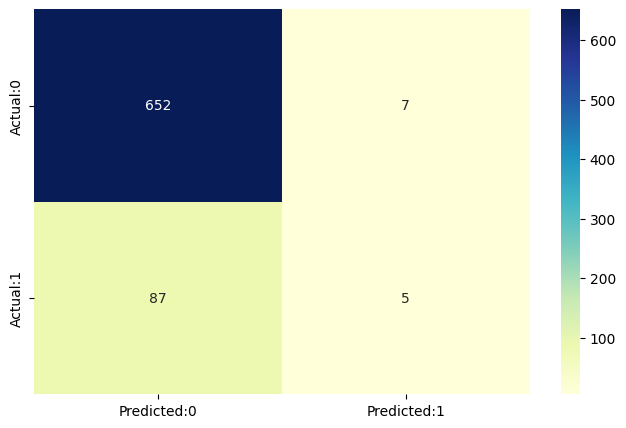

In [45]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

True Negatives (TN): 652
These are cases where the actual value was 0 (no CHD) and the model correctly predicted 0 (no CHD).
False Positives (FP): 7
These are cases where the actual value was 0 (no CHD) but the model incorrectly predicted 1 (CHD). This is a Type I error.
False Negatives (FN): 87
These are cases where the actual value was 1 (CHD) but the model incorrectly predicted 0 (no CHD). This is a Type II error.
True Positives (TP): 5
These are cases where the actual value was 1 (CHD) and the model correctly predicted 1 (CHD).
Outcome of the graph:

Total Correct Predictions: 652 (TN) + 5 (TP) = 657
Total Incorrect Predictions: 7 (FP) + 87 (FN) = 94
Summary: The model shows high accuracy in identifying individuals who do not have a 10-year risk of CHD (652 True Negatives). However, it struggles significantly with identifying individuals who are at risk, with only 5 True Positives and 87 False Negatives. This indicates that the model frequently misses actual cases of heart disease risk, likely due to the class imbalance in the dataset.

In [50]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

Model Evaluation - Statistics

In [49]:
print('The acuuracy of the model = TP+TN/(TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'The Missclassification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensitivity or True Positive Rate = TP/(TP+FN) = ',TP/float(TP+FN),'\n',

'Specificity or True Negative Rate = TN/(TN+FP) = ',TN/float(TN+FP),'\n',

'Positive Predictive value = TP/(TP+FP) = ',TP/float(TP+FP),'\n',

'Negative predictive Value = TN/(TN+FN) = ',TN/float(TN+FN),'\n',

'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n',

'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity)

The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.8748335552596538 
 The Missclassification = 1-Accuracy =  0.12516644474034622 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.05434782608695652 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.9893778452200304 
 Positive Predictive value = TP/(TP+FP) =  0.4166666666666667 
 Negative predictive Value = TN/(TN+FN) =  0.8822733423545331 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  5.116459627329198 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.9558048813016804


From the above statistics it is clear that the model is highly specific than sensitive. The negative values are predicted more accurately than the positives.

Predicted probabilities of 0 (No Coronary Heart Disease) and 1 ( Coronary Heart Disease: Yes) for the test data with a default classification threshold of 0.5

In [51]:
y_pred_prob=logreg.predict_proba(x_test)[:,:]
y_pred_prob_df=pd.DataFrame(data=y_pred_prob, columns=['Prob of no heart disease (0)','Prob of Heart Disease (1)'])
y_pred_prob_df.head()

,Prob of no heart disease (0),Prob of Heart Disease (1)
0,0.874620,0.125380
1,0.955979,0.044021
2,0.783921,0.216079
3,0.806901,0.193099
4,0.892443,0.107557


### Lower the threshold
Since the model is predicting Heart disease too many type II errors is not advisable. A False Negative ( ignoring the probability of disease when there actualy is one) is more dangerous than a False Positive in this case. Hence inorder to increase the sensitivity, threshold can be lowered.

In [56]:
from sklearn.preprocessing import binarize
for i in range(1,5):
    cm2=0
    y_pred_prob_yes=logreg.predict_proba(x_test)
    # Correcting the binarize call to directly threshold the positive class probabilities
    y_pred2=(y_pred_prob_yes[:,1] > i/10).astype(int)
    cm2=confusion_matrix(y_test,y_pred2)
    print ('With',i/10,'threshold the Confusion Matrix is ','\n',cm2,'\n',
            'with',cm2[0,0]+cm2[1,1],'correct predictions and',cm2[1,0],'Type II errors( False Negatives)','\n\n',
          'Sensitivity: ',cm2[1,1]/(float(cm2[1,1]+cm2[1,0])),'Specificity: ',cm2[0,0]/(float(cm2[0,0]+cm2[0,1])), '\n\n\n')


With 0.1 threshold the Confusion Matrix is  
 [[310 349]
 [ 12  80]] 
 with 390 correct predictions and 12 Type II errors( False Negatives) 

 Sensitivity:  0.8695652173913043 Specificity:  0.47040971168437024 



With 0.2 threshold the Confusion Matrix is  
 [[519 140]
 [ 43  49]] 
 with 568 correct predictions and 43 Type II errors( False Negatives) 

 Sensitivity:  0.532608695652174 Specificity:  0.787556904400607 



With 0.3 threshold the Confusion Matrix is  
 [[600  59]
 [ 64  28]] 
 with 628 correct predictions and 64 Type II errors( False Negatives) 

 Sensitivity:  0.30434782608695654 Specificity:  0.9104704097116844 



With 0.4 threshold the Confusion Matrix is  
 [[640  19]
 [ 80  12]] 
 with 652 correct predictions and 80 Type II errors( False Negatives) 

 Sensitivity:  0.13043478260869565 Specificity:  0.9711684370257967 





### Intention of the Code Block (Threshold Adjustment):

The intention of this code block is to **explore how changing the classification threshold affects the model's performance**, particularly in the context of heart disease prediction. In logistic regression, the default threshold for classifying a positive outcome (e.g., CHD) is usually 0.5. However, in medical scenarios, a False Negative (missing a patient who actually has the disease) can be more dangerous than a False Positive (incorrectly identifying a healthy patient as having the disease). This block systematically tests lower thresholds (0.1, 0.2, 0.3, 0.4) to see how the model's ability to detect actual heart disease cases (Sensitivity) and correctly identify healthy individuals (Specificity) changes.

### Outcome Explanation:

The output shows the confusion matrix, correct predictions, Type II errors (False Negatives), Sensitivity, and Specificity for each tested threshold:

*   **Threshold 0.1**: With a very low threshold, the model becomes very sensitive. It identifies a high number of actual CHD cases (high Sensitivity), but at the cost of misclassifying many healthy individuals as having CHD (low Specificity, high False Positives). Notice the significantly reduced Type II errors.

*   **Threshold 0.2**: This threshold offers a more balanced approach. Sensitivity is still much higher than the default (0.5), but Specificity has improved compared to 0.1, meaning fewer healthy individuals are incorrectly flagged.

*   **Threshold 0.3 & 0.4**: As the threshold increases, the model becomes more specific (better at identifying truly healthy individuals) but less sensitive (missing more actual CHD cases). The number of Type II errors (False Negatives) increases significantly, which is undesirable in this medical context.

**In Summary:** This analysis demonstrates a crucial trade-off. Lowering the classification threshold increases the model's **Sensitivity** (better at catching true positives) while decreasing its **Specificity** (more false positives). Conversely, raising the threshold increases Specificity but decreases Sensitivity. For heart disease prediction, a lower threshold might be preferred to minimize False Negatives, even if it leads to more False Positives, because early detection can be critical for patient outcomes.

### ROC Curve Explanation:

The **Receiver Operating Characteristic (ROC) curve** is a graph that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. It plots two parameters:

*   **True Positive Rate (TPR)**: Also known as **Sensitivity**, this is the proportion of actual positive cases that are correctly identified by the model.
*   **False Positive Rate (FPR)**: This is the proportion of actual negative cases that are incorrectly identified as positive by the model (1 - Specificity).

**What the Graph Shows (in simple terms):**

*   **Ideal Scenario**: A perfect model would have a point at the top-left corner of the graph (0,1), meaning 100% True Positive Rate and 0% False Positive Rate. This implies it correctly identifies all positive cases and has no false alarms.

*   **Diagonal Line**: A diagonal line from (0,0) to (1,1) represents a model that performs no better than random guessing. For example, if you randomly guess whether someone has heart disease, you'd get roughly as many true positives as false positives.

*   **Your Graph**: The ROC curve for your heart disease classifier shows how well your model distinguishes between patients with and without heart disease across different thresholds. The closer the curve bends towards the top-left corner, the better the model's performance. The area under the curve (AUC) is often calculated to quantify this performance; a higher AUC indicates a better model. In your graph, the curve is above the diagonal line, indicating that your model performs better than random guessing, but there's still room for improvement as it doesn't reach the top-left corner perfectly.

### ROC curve

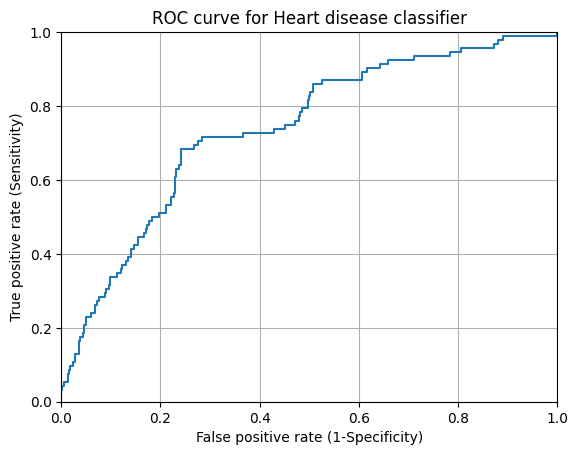

In [57]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_yes[:,1])
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Heart disease classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

A common way to visualize the trade-offs of different thresholds is by using an ROC curve, a plot of the true positive rate (# true positives/ total # positives) versus the false positive rate (# false positives / total # negatives) for all possible choices of thresholds. A model with good classification accuracy should have significantly more true positives than false positives at all thresholds.

The optimum position for roc curve is towards the top left corner where the specificity and sensitivity are at optimum levels

Area Under The Curve (AUC)
The area under the ROC curve quantifies model classification accuracy; the higher the area, the greater the disparity between true and false positives, and the stronger the model in classifying members of the training dataset. An area of 0.5 corresponds to a model that performs no better than random classification and a good classifier stays as far away from that as possible. An area of 1 is ideal. The closer the AUC to 1 the better.

In [58]:
sklearn.metrics.roc_auc_score(y_test,y_pred_prob_yes[:,1])

np.float64(0.7387015900244112)

### Conclusions:
- **All attributes selected after the elimination process show Pvalues lower than 5% and thereby suggesting significant role in the Heart disease prediction.**

- **Men seem to be more susceptible to heart disease than women.Increase in Age,number of cigarettes smoked per day and systolic Blood Pressure also show increasing odds of having heart disease.**

- **Total cholesterol shows no significant change in the odds of CHD. This could be due to the presence of 'good cholesterol(HDL) in the total cholesterol reading.Glucose too causes a very negligible change in odds (0.2%)**

- **The model predicted with 0.88 accuracy. The model is more specific than sensitive.**

- **The Area under the ROC curve is 73.5 which is somewhat satisfactory. **

- ** Overall model could be improved with more data.**